In [1]:
import sys
import itertools
import pandas as pd
import numpy as np
import gseapy as gp
from matplotlib import pyplot as plt
from functools import reduce  # intersect more than two arrays

#from scipy.interpolate import interp1d, splev, splrep  # to connect plot smoothly
#from decimal import *    # for displaying decimal values
#getcontext().prec = 8    # number of decimal digits
% matplotlib inline

general_output_dir = '/Users/Miko/Desktop/CCBB/Network/output/rep_perm'
fdr_cutoff = 0.3 # significant pathways are those with fdr<=0.3

# permutation number
perm_num_all = [5, 8, 10, 12, 15, 50, 100, 500, 600, 1000]

# number of iterations for each permutation number
i_all = [1,2,3,4,5,6,7,8,9,10]

In [2]:
# returns a list containing significant pathways for each iteration
def sig_pathways(perm_num, i_all):
    
    sig_path_list = []
    for i in i_all:
        # locate the directory and output file
        output_dir = general_output_dir +"/"+ str(perm_num) +"/"+ str(i)
        #print(output_dir)
        output_file = output_dir + "/gseapy.gsea.gene_set.report.csv"

        # reads in output
        df_output = pd.read_csv(output_file)
        #df_output.head()

        # get the sig. pathways from results
        sig_path = df_output[df_output['fdr'] <= fdr_cutoff]['Term'].tolist()
        #print("number of sig. path: ", len(sig_path))
        sig_path_list.append(sig_path)
        #print("number of iterations: ", len(sig_path_list))

    return sig_path_list

In [3]:
# a function to calculate repeatability ratio
# Repeatability ratio is defined as: 
# the intersection divided by the union of 
# the sig. pathways for each output from a single perm_num experiment
def repeatability_ratio(perm_num):

    sig_path_tuple = tuple(sig_pathways(perm_num, i_all))
    print(len(sig_path_tuple))
    intersection = reduce(np.intersect1d, sig_path_tuple)
    print(len(intersection))
    #type(intersection)

    union = reduce(np.union1d, sig_path_tuple)
    print(len(union))
    #type(union)

    #rep_ratio = Decimal(len(intersection))/Decimal(len(union))
    rep_ratio = float(len(intersection))/float(len(union))
    print(rep_ratio)
    return rep_ratio

### Master cell

In [4]:
# find out repeatability ratio for each permutation number

rep_ratio_list = []
for perm_num in perm_num_all:
    print("\n")
    print(perm_num)
    rep_ratio_list.append([perm_num, repeatability_ratio(perm_num)])
    
print(rep_ratio_list)    



5
10
24
662
0.036253776435


8
10
15
579
0.0259067357513


10
10
4
544
0.00735294117647


12
10
18
523
0.0344168260038


15
10
32
423
0.0756501182033


50
10
124
225
0.551111111111


100
10
135
202
0.668316831683


500
10
145
175
0.828571428571


600
10
146
170
0.858823529412


1000
10
145
168
0.863095238095
[[5, 0.03625377643504532], [8, 0.025906735751295335], [10, 0.007352941176470588], [12, 0.03441682600382409], [15, 0.07565011820330969], [50, 0.5511111111111111], [100, 0.6683168316831684], [500, 0.8285714285714286], [600, 0.8588235294117647], [1000, 0.8630952380952381]]


In [5]:
# compared with pairwise ratios
#[[5, 0.44067795611098853], [10, 0.36162053831695457], [50, 0.80208912449984526], 
# [100, 0.86647888668580342], [500, 0.93350633208356271], [600, 0.93921743985567474]]

In [11]:
print(rep_ratio_list)   

[[5, 0.03625377643504532], [8, 0.025906735751295335], [10, 0.007352941176470588], [12, 0.03441682600382409], [15, 0.07565011820330969], [50, 0.5511111111111111], [100, 0.6683168316831684], [500, 0.8285714285714286], [600, 0.8588235294117647], [1000, 0.8630952380952381]]


In [6]:
type(rep_ratio_list)

list

In [7]:
data = np.array(rep_ratio_list) # create a multi-dimension array

In [8]:
# Do a transpose on the data (ndarray), to get the perm_num in the first column,
# rather than the first row
x, y = data.T 

In [9]:
# Graph the dots and connect them with straight lines
#plt.scatter(x,y)
#plt.plot(x, y)

Text(0.5,0,u'Permutation number')

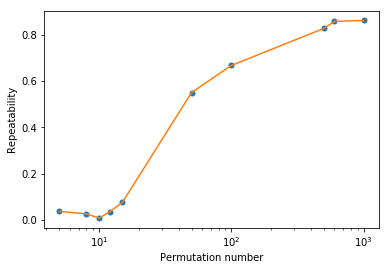

In [10]:
# graph the dots in log scale (x in log, y in linear), because we increase x exponentially
plt.semilogx(x,y,'.',markersize=10)
plt.plot(x, y)

"""
# Graph with smooth lines
x_smooth = np.linspace(x.min(), x.max(), num=6)
y_smooth = y
spl = splrep(x_smooth, y_smooth)

x2 = np.linspace(x.min(), x.max(), num=1000)
y2 = splev(x2, spl)
plt.plot(x_smooth, y_smooth, 'o', x2, y2)

plt.show()

"""
plt.ylabel('Repeatability')
plt.xlabel('Permutation number')

#plt.savefig('foo.png')